In [100]:
import re
import pandas as pd

In [101]:
f = open('WhatsApp Chat with Hola Amigos.txt','r',encoding='utf-8')

In [102]:
data = f.read()

In [103]:
# data

In [104]:
pattern = r"\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}(?:\s-\s|\sAM|\sPM)\s+- "

In [105]:
message = re.split(pattern,data)[1:]

In [106]:
dates = re.findall(pattern,data)
dates

['4/9/22, 7:53\u202fAM - ',
 '4/9/22, 6:07\u202fPM - ',
 '4/9/22, 6:07\u202fPM - ',
 '4/9/22, 7:41\u202fPM - ',
 '4/9/22, 10:55\u202fPM - ',
 '4/9/22, 10:55\u202fPM - ',
 '4/9/22, 10:56\u202fPM - ',
 '4/10/22, 2:17\u202fPM - ',
 '4/11/22, 1:49\u202fPM - ',
 '4/11/22, 8:43\u202fPM - ',
 '4/12/22, 12:35\u202fPM - ',
 '4/12/22, 12:51\u202fPM - ',
 '4/12/22, 1:02\u202fPM - ',
 '4/12/22, 2:02\u202fPM - ',
 '4/12/22, 2:15\u202fPM - ',
 '4/12/22, 3:53\u202fPM - ',
 '4/12/22, 6:29\u202fPM - ',
 '4/12/22, 6:30\u202fPM - ',
 '4/12/22, 6:30\u202fPM - ',
 '4/12/22, 8:32\u202fPM - ',
 '4/12/22, 8:32\u202fPM - ',
 '4/12/22, 8:43\u202fPM - ',
 '4/12/22, 10:16\u202fPM - ',
 '4/13/22, 10:28\u202fAM - ',
 '4/13/22, 11:32\u202fAM - ',
 '4/13/22, 1:08\u202fPM - ',
 '4/13/22, 1:08\u202fPM - ',
 '4/13/22, 1:08\u202fPM - ',
 '4/13/22, 8:11\u202fPM - ',
 '4/14/22, 1:01\u202fPM - ',
 '4/16/22, 2:14\u202fPM - ',
 '4/17/22, 6:09\u202fPM - ',
 '4/19/22, 6:52\u202fAM - ',
 '4/19/22, 8:59\u202fAM - ',
 '4/19/22, 10

In [107]:
df = pd.DataFrame({'user_message':message, 'message_date':dates})

In [108]:
# df.head()

In [109]:
final=[]
for i in df['message_date']:
    # x = i.split(",")[0]
    # y = i.split(",")[1].replace("-",'').strip()
    final.append(i.split(",")[0]+", "+pd.to_datetime(i.split(",")[1].replace("-",'').strip(),format='%I:%M %p').strftime('%H:%M:%S'))
df['message_date']=pd.DataFrame(final)

In [110]:
# df.head()

In [111]:
final=[]
for i in df.message_date:
    final.append(pd.to_datetime(i))
df['message_date']=pd.DataFrame(final)
df.rename(columns={'message_date':'date'},inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_message  2289 non-null   object        
 1   date          2289 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 35.9+ KB


In [113]:
# Seperate users and messages
users=[]
messages = []
for message in df.user_message:
    entry = re.split(r"([\w\W]+?):\s",message.strip())
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append("Group_Notification")
        messages.append(entry[0])
df['user']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)

In [114]:
df['year']=df['date'].dt.year

In [115]:
df['month']=df['date'].dt.month_name()

In [116]:
df['day']=df['date'].dt.day

In [117]:
df['hour']=df['date'].dt.hour

In [118]:
df['minute']=df['date'].dt.minute

In [119]:
# df.head()

In [120]:
words=[]
for message in df.message:
    words.extend(message.split())

In [121]:
len(words)

13959

In [122]:
# !pip install urlextract

In [123]:
from urlextract import URLExtract
extractor = URLExtract()
urls = extractor.find_urls("Find this link https://www.youtube.com/watch?v=Q0QwvZKG_6Q&list=PLKnIA16_RmvY5eP91BGPa0vXUYmIdtfPQ&index=7")

In [124]:
urls

['https://www.youtube.com/watch?v=Q0QwvZKG_6Q&list=PLKnIA16_RmvY5eP91BGPa0vXUYmIdtfPQ&index=7']

In [125]:
links = []
for i in df.message:
    links.extend(extractor.find_urls(i))

In [126]:
links

['https://forms.gle/i9Fad4mhJg2CLSCV8',
 'https://docs.google.com/forms/d/e/1FAIpQLSfXTIhhIqw80tpNIp90TFIvH2HwF6j0hHHzoscuAnKdfaNSHQ/viewform?usp=sf_link',
 'internshala.com/i/isp29-cr.',
 'https://drive.google.com/drive/folders/1E_yyJm5AK-q8ks0-KfHL9U4ijCzDeoUp',
 'vtu4u.com',
 'https://docs.google.com/forms/d/e/1FAIpQLSemj6XLUrPWYzZ_xsc4-4hBb5qGfy4XH90DqaPnMdcupi2Z2g/viewform',
 'https://chat.whatsapp.com/G8UywwcbY3SDcZtmJyk1SB',
 'https://forms.gle/8Ly4rGan6xdTRvts5',
 'https://www.instagram.com/p/Cc8AZl6Derc/?utm_source=ig_web_copy_link',
 'https://results.vtu.ac.in/index_fm.php',
 'https://docs.google.com/spreadsheets/d/1PNHCAg-9MmhuluZgl5TNcm8SxN9X50CnLMx10CBlmAs/edit?usp=sharing',
 'https://www.instagram.com/reel/CdbCP5GJdTh/?igshid=YmMyMTA2M2Y=',
 'https://www.instagram.com/p/CdcvCsFJ0EE/?igshid=YmMyMTA2M2Y=',
 'https://chat.whatsapp.com/JAJVj71VMsyBat4NB16Qty',
 'https://chat.whatsapp.com/EJGderWsQGU542P4bZ9ZrY',
 'https://maps.app.goo.gl/kfcUsbotNnKCZx5w6',
 'https://chat.wha

In [127]:
x = df['user'].value_counts().head()

In [128]:
import matplotlib.pyplot as plt

In [129]:
name = x.index
count = x.values

In [130]:
# plt.bar(name,count)
# plt.xticks(rotation='vertical')
# plt.show()

In [131]:
# round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'user':'name','count':'percent'})

In [132]:
words=[]
for message in df.message:
    words.extend(message.split())

In [140]:
## Remove Group Notifications and Media omitted
temp = df[df['user']!="Group_Notification"]
temp = temp[temp['message']!="<Media omitted>"]

In [144]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()

In [141]:
words=[]
for message in temp.message:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [187]:
# words

In [188]:
from collections import Counter
# pd.DataFrame(Counter(words).most_common(20))

In [186]:
# !pip install emoji

In [146]:
import emoji

In [149]:
emojis = []
for message in df.message:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [151]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🎂,540
1,🥳,407
2,🎈,352
3,🎉,305
4,🕯,240
...,...,...
75,😔,1
76,💞,1
77,🌾,1
78,🚀,1


In [154]:
df['month_num']=df['date'].dt.month 

In [185]:
# df.head()

In [160]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [162]:
timeline.sample(5)

,year,month_num,month,message
18,2023,11,November,5
20,2024,4,April,1
6,2022,10,October,170
15,2023,7,July,2
9,2023,1,January,245


In [164]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [166]:
timeline['time']=time

In [168]:
timeline.sample(5)

,year,month_num,month,message,time
10,2023,2,February,43,February-2023
16,2023,8,August,3,August-2023
5,2022,9,September,22,September-2022
6,2022,10,October,170,October-2022
4,2022,8,August,72,August-2022


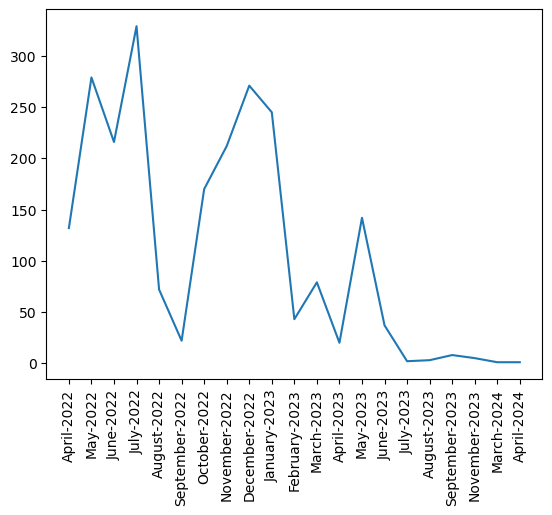

In [171]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [173]:
df['day_name']=df['date'].dt.day_name()

In [174]:
df['day_name'].value_counts()

day_name
Tuesday      404
Monday       400
Wednesday    374
Thursday     314
Friday       290
Saturday     274
Sunday       233
Name: count, dtype: int64

In [178]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour==23:
        period.append(str(hour)+"-"+str('00'))
    elif hour==0:
        period.append(str('00')+"-"+str(hour+1))
    else:
        period.append(str(hour)+"-"+str(hour+1))

In [179]:
df['period']=period

In [184]:
# df.sample()

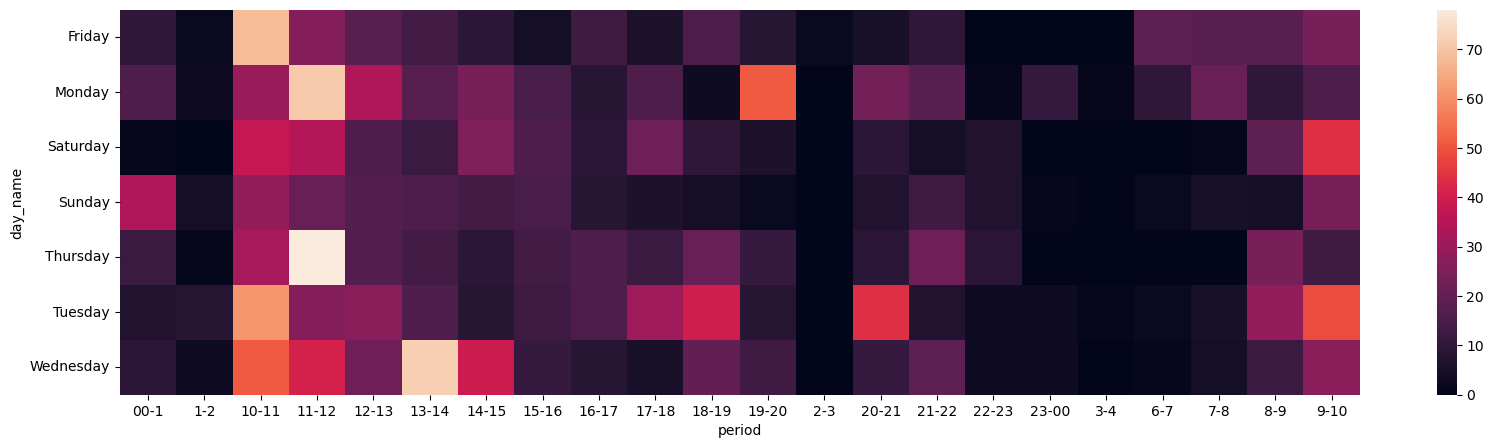

In [183]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.xticks(rotation='horizontal')
plt.show()